## DATA 602 Fall 2024 - Assignments 7 & 8
### Stephanie Chiang

## NYC SHSAT

Continuing from my my previous work on [Assignment 7]("https://github.com/stephbc/DATA602_Fall2024/blob/main/assignment_07.ipynb"), I will examine the NYC middle schools and the numbers of students who "participated in High School Admissions, the number of those students who took the Specialized High Schools Admissions Test (SHSAT) and the number who received an offer to one of the 8 testing Specialized High Schools" for the 2020-2021 school year.

The raw file for the *2020-2021 SHSAT Admissions Test Offers By Sending School*, provided by the NYC Department of Education, is available for download [here]("https://data.cityofnewyork.us/Education/2020-2021-SHSAT-Admissions-Test-Offers-By-Sending-/k8ah-28f4/about_data").


## Assignment 7
### Data Exploration

- importing the dataset and creating dataframes
- missing value information
- relevant information about the dataset
- summary statistics means, medians, quartiles

In [174]:
import pandas as pd

data = pd.read_csv("2021shsat.csv")

# modifying multiple column names to more code-friendly format
data.rename(
  columns = {
    "Feeder School DBN": "DBN",
    "Feeder School Name": "school",
    "Count of Students in HS Admissions": "hs_bound",
    "Count of Testers": "testers",
    "Number of Offers": "offers"
  },
  inplace = True
)

print(data.isna().sum())
# there appears to be no missing data

print(data.shape)
# there are 658 rows (observations) and 5 columns:
# the middle school"s District/Borough Number
# the name of the middle school
# the number of students who participated in HS admissions
# the number of students who took the SHSAT
# and the number of students who received an offer from a specialized HS

print(data.dtypes)
# all the columns are listed as "object" which indicates mixed types or categorical features
# this is because "0-5" appears as a (very common) possible value
# so pandas was unable to automatically convert these columns to integer types

DBN         0
school      0
hs_bound    0
testers     0
offers      0
dtype: int64
(658, 5)
DBN         object
school      object
hs_bound    object
testers     object
offers      object
dtype: object



The last 3 columns include values of "0-5" for any count of 5 students or fewer. There are a few different ways this could be handled, but for the sake of calculating summary statistics, I will convert these columns to floats, with a mean of 2.5 for the "0-5" values. Since there are no half-students counted in the original data, this means they can still be grouped easily from the rest of the data.

In [175]:
# convert variables to proper types

data["hs_bound"] = data["hs_bound"].where(data["hs_bound"] != "0-5", "2.5")
data["testers"] = data["testers"].where(data["testers"] != "0-5", "2.5")
data["offers"] = data["offers"].where(data["offers"] != "0-5", "2.5")

data[["hs_bound", "testers", "offers"]] = data[["hs_bound", "testers", "offers"]].astype(float)

print(data.dtypes)
print(data.head(5))

# summary statistics: mean, median and quantile
print(data.describe())

DBN          object
school       object
hs_bound    float64
testers     float64
offers      float64
dtype: object
      DBN                                          school  hs_bound  testers  \
0  01M034         P.S. 034 FRANKLIN D. ROOSEVELT (01M034)      44.0      2.5   
1  01M140                 P.S. 140 NATHAN STRAUS (01M140)      56.0      9.0   
2  01M184                   P.S. 184M SHUANG WEN (01M184)     112.0     79.0   
3  01M188             P.S. 188 THE ISLAND SCHOOL (01M188)      49.0      2.5   
4  01M332  UNIVERSITY NEIGHBORHOOD MIDDLE SCHOOL (01M332)      70.0     10.0   

   offers  
0     2.5  
1     2.5  
2    29.0  
3     2.5  
4     2.5  
         hs_bound     testers      offers
count  658.000000  658.000000  658.000000
mean   110.291033   33.481763    7.302432
std    117.052890   51.161930   17.803182
min      2.500000    2.500000    2.500000
25%     48.000000    7.000000    2.500000
50%     77.000000   16.000000    2.500000
75%    119.750000   33.000000    2.5000

### DATA WRANGLING

In [176]:
# Create new columns based on existing columns or calculations.

# percent of high school bound students taking the SHSAT
data["pct_testers"] = data["testers"] / data["hs_bound"]

# percent of students taking the SHSAT who received an offer
data["pct_offers"] = data["offers"] / data["testers"]

print(data.head(5))

# Drop column(s) from your dataset.
data = data.drop(["DBN"], axis=1)

# Drop a row(s) from your dataset.
idx_max = data["hs_bound"].idxmax()
data_dropped_max_hs = data.drop([idx_max])

print(data.shape) # there is now one less row and one less column

      DBN                                          school  hs_bound  testers  \
0  01M034         P.S. 034 FRANKLIN D. ROOSEVELT (01M034)      44.0      2.5   
1  01M140                 P.S. 140 NATHAN STRAUS (01M140)      56.0      9.0   
2  01M184                   P.S. 184M SHUANG WEN (01M184)     112.0     79.0   
3  01M188             P.S. 188 THE ISLAND SCHOOL (01M188)      49.0      2.5   
4  01M332  UNIVERSITY NEIGHBORHOOD MIDDLE SCHOOL (01M332)      70.0     10.0   

   offers  pct_testers  pct_offers  
0     2.5     0.056818    1.000000  
1     2.5     0.160714    0.277778  
2    29.0     0.705357    0.367089  
3     2.5     0.051020    1.000000  
4     2.5     0.142857    0.250000  
(658, 6)


In [177]:

# Filter your data based on some condition.
ignore_min_hs_bound = data[data["hs_bound"] != 2.5]
ignore_min_testers = ignore_min_hs_bound[ignore_min_hs_bound["testers"] != 2.5]
ignore_min_offers = ignore_min_testers[ignore_min_testers["offers"] != 2.5]

print(ignore_min_offers.head(3))

# Sort your data based on multiple variables.
ignore_min_offers = ignore_min_offers.sort_values(by=["pct_offers", "pct_testers"], ascending=[False, True])

print(ignore_min_offers.head(5))

# Convert all the string values to upper or lower cases in one column.
data_lower = data["school"].str.lower()

print(data_lower.head(3))


                                              school  hs_bound  testers  \
2                      P.S. 184M SHUANG WEN (01M184)     112.0     79.0   
7  NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...     135.0    116.0   
8             TOMPKINS SQUARE MIDDLE SCHOOL (01M839)     113.0     33.0   

   offers  pct_testers  pct_offers  
2    29.0     0.705357    0.367089  
7    76.0     0.859259    0.655172  
8     8.0     0.292035    0.242424  
                                                school  hs_bound  testers  \
45                        THE ANDERSON SCHOOL (03M334)      60.0     55.0   
71                  COLUMBIA SECONDARY SCHOOL (05M362)      99.0     20.0   
294     THE CHRISTA MCAULIFFE SCHOOL\I.S. 187 (20K187)     340.0    315.0   
17            M.S. 255 SALK SCHOOL OF SCIENCE (02M255)     125.0    104.0   
22   NEW YORK CITY LAB MIDDLE SCHOOL FOR COLLABORAT...     179.0    169.0   

     offers  pct_testers  pct_offers  
45     45.0     0.916667    0.818182  
71     15.

In [178]:

# Group your dataset by one column, and get the mean, min, and max values by group.
# .groupby() .agg() or .apply()

grouped_data = data.groupby("offers", as_index=False).agg({
  "testers": ["mean", "min", "max"],
  "hs_bound": ["mean", "min", "max"]
})

print(grouped_data.head(10))

  offers     testers                  hs_bound              
                mean    min    max        mean    min    max
0    2.5   16.954212    2.5  164.0   79.878205    2.5  708.0
1    6.0   87.300000   22.0  169.0  224.700000   49.0  495.0
2    7.0   81.400000   38.0  159.0  219.600000   87.0  585.0
3    8.0   55.833333   26.0  117.0  167.500000   60.0  368.0
4    9.0   46.222222   28.0   93.0  121.444444   54.0  340.0
5   10.0   75.400000   47.0  157.0  206.200000  104.0  549.0
6   11.0   65.000000   53.0   77.0  199.666667   92.0  358.0
7   12.0   66.000000   29.0   96.0  187.333333  105.0  316.0
8   13.0  127.500000  123.0  132.0  519.000000  428.0  610.0
9   14.0   54.000000   32.0   76.0  125.500000   59.0  307.0


In [179]:
# Group your dataset by two columns and then sort the aggregated results within the groups.
grouped_data_2 = data.groupby(["offers", "testers"]).agg({
  "pct_offers": ["mean", "min", "max"],
  "pct_testers": ["mean", "min", "max"],
})

grouped_data_2 = grouped_data_2.sort_values(by=["offers", "testers"], ascending=[False, False])

print(grouped_data_2.head(15))

               pct_offers                     pct_testers                    
                     mean       min       max        mean       min       max
offers testers                                                               
221.0  315.0     0.701587  0.701587  0.701587    0.926471  0.926471  0.926471
151.0  298.0     0.506711  0.506711  0.506711    0.702830  0.702830  0.702830
126.0  219.0     0.575342  0.575342  0.575342    0.835878  0.835878  0.835878
117.0  169.0     0.692308  0.692308  0.692308    0.944134  0.944134  0.944134
110.0  374.0     0.294118  0.294118  0.294118    0.700375  0.700375  0.700375
102.0  342.0     0.298246  0.298246  0.298246    0.598949  0.598949  0.598949
97.0   219.0     0.442922  0.442922  0.442922    0.649852  0.649852  0.649852
82.0   318.0     0.257862  0.257862  0.257862    0.550173  0.550173  0.550173
       221.0     0.371041  0.371041  0.371041    0.541667  0.541667  0.541667
80.0   248.0     0.322581  0.322581  0.322581    0.518828  0.518

## ASSIGNMENT 8

### VISUALIZATIONS

##### Part 1: Matplotlib

Using matplotlib, create two plots that incorporate the following properties:
- Change the title and x/y labels
- Change the marker, line colors, and line width
- Modify Axis Text Ticks/Labels
- Use and change a legend position
- Create a single legend for all subplots

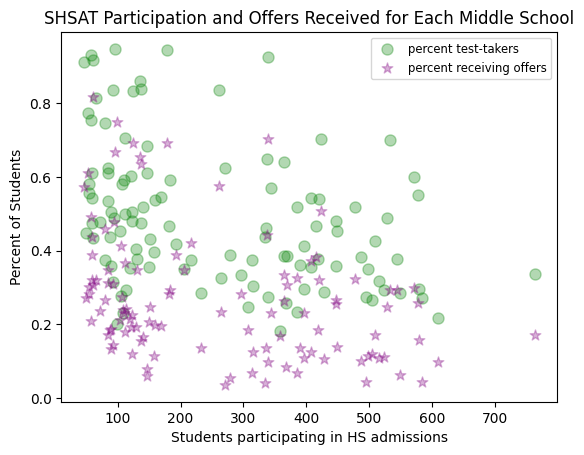

In [180]:

# Plot 1:
# This plot aims to represent the relationships between the number of students at each middle school
# participating in high school admissions and the percentage of those students who take the SHSAT,
# and the percentage of THOSE students who successfully receive at least one offer from a specialized HS.
# I have omitted the 2.5 value in the number of students column that
# represents 5 or fewer students in each column of the original dataset.

from matplotlib import pyplot as plt

plt.scatter(
  ignore_min_offers["hs_bound"],
  ignore_min_offers["pct_testers"],
  s=8**2,
  c=["green"],
  alpha=0.3,
  label="percent test-takers",
)

plt.scatter(
  ignore_min_offers["hs_bound"],
  ignore_min_offers["pct_offers"],
  s=8**2,
  c=["purple"],
  marker="*",
  alpha=0.3,
  label="percent receiving offers",
)

plt.xlabel("Students participating in HS admissions")
plt.ylabel("Percent of Students")
plt.title("SHSAT Participation and Offers Received for Each Middle School")

plt.legend(
  loc='upper right',
  fontsize='small',
)

plt.show()

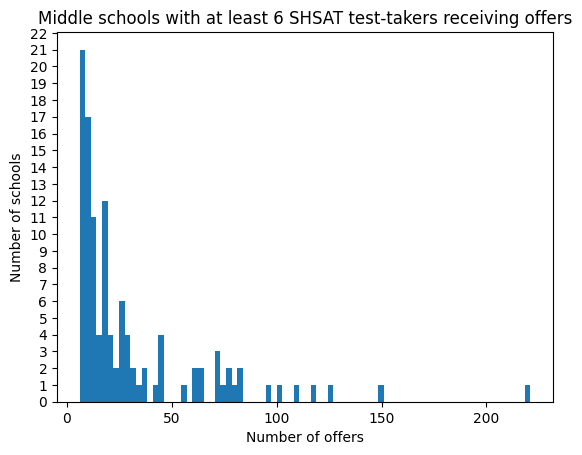

In [181]:
# Plot 2:
# This plot represents the count of observations (number of middle schools) that had at least 6 students
# receive an offer to a specialized high school aka the frquency of the number of "successful" students.

plt.hist(ignore_min_offers["offers"], bins=80)

plt.xlabel("Number of offers")
plt.ylabel("Number of schools")
plt.yticks(range(0, 23))
plt.title("Middle schools with at least 6 SHSAT test-takers receiving offers")

plt.show()

##### Part 2: Seaborn

                                              school  hs_bound   offer_type  \
0                       THE ANDERSON SCHOOL (03M334)      60.0  pct_testers   
1                 COLUMBIA SECONDARY SCHOOL (05M362)      99.0  pct_testers   
2     THE CHRISTA MCAULIFFE SCHOOL\I.S. 187 (20K187)     340.0  pct_testers   
3           M.S. 255 SALK SCHOOL OF SCIENCE (02M255)     125.0  pct_testers   
4  NEW YORK CITY LAB MIDDLE SCHOOL FOR COLLABORAT...     179.0  pct_testers   

    percent  
0  0.916667  
1  0.202020  
2  0.926471  
3  0.832000  
4  0.944134  


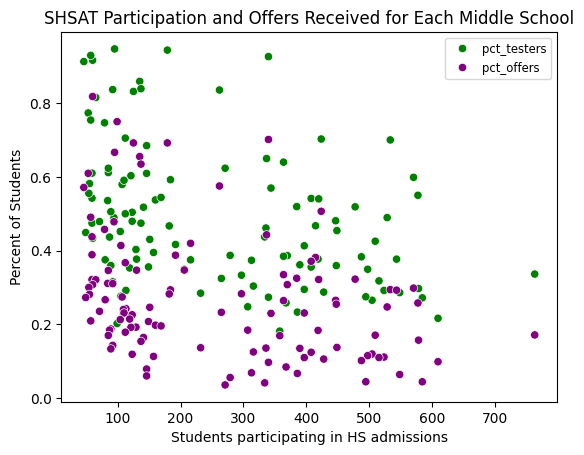

In [182]:
# Plot 1:
import seaborn as sns

# for seaborn, a tidy / long dataset works better here

tidy_pcts = pd.melt(
  ignore_min_offers,
  id_vars=["school", "hs_bound"],
  value_vars=["pct_testers", "pct_offers"],
  var_name="offer_type",
  value_name="percent"
)

print(tidy_pcts.head(5))

sns.scatterplot(
  data=tidy_pcts,
  x="hs_bound",
  y="percent",
  hue="offer_type",
  palette=["green", "purple"],
  markers=["o", "*"]
)

plt.xlabel("Students participating in HS admissions")
plt.ylabel("Percent of Students")
plt.title("SHSAT Participation and Offers Received for Each Middle School")

plt.legend(
  loc='upper right',
  fontsize='small',
)

plt.show()


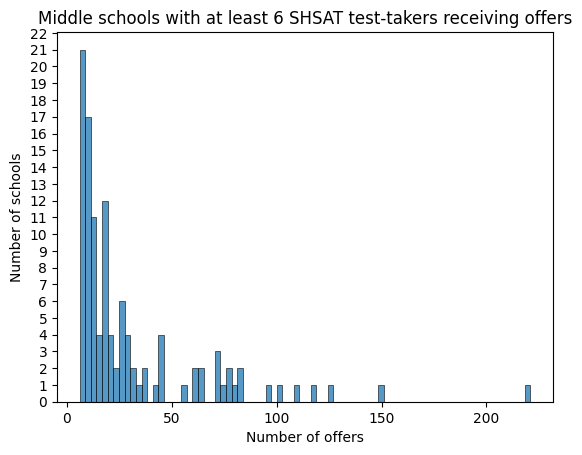

In [183]:
# Plot 2:

sns.histplot(
  data=ignore_min_offers,
  x="offers",
  bins=80,
)

plt.xlabel("Number of offers")
plt.ylabel("Number of schools")
plt.yticks(range(0, 23))
plt.title("Middle schools with at least 6 SHSAT test-takers receiving offers")

plt.show()

##### Part 3:

Since Seaborn is built on top of Matplotlib, at this level of simple plotting, they function pretty similarly. Seaborn is perhaps quicker and more efficient to use, but Matplotlib has finer control.

Matplotlib is also more flexible; even though more code was used for the 1st plot, the dataframe was not required to be changed in any way. The plots did look more basic until specific adjustments were made to customize the visuals. Seaborn created a plot that was very close to the original Matplotlib without as much customization or code; but the dataframe had to be tidied to a long format first to achieve the same structure.

### CONCLUSIONS

The school with the highest precentage of high school boound middle schoolers receiving an offer was 'THE ANDERSON SCHOOL'. However, based on how the most common number of offers made was '0-5', it could be assumed that most schools did not have any students receive any offers.

Given more time and better data, I would like to figure out why the data was listed in this way - excluding values 5 and leads to biased results and distorts the summary statistics. This may lead people to draw the wrong conclusions from the data.